In [ ]:
import itertools
import os

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import re
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import statsmodels.api as sm
#from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Выгружаем файл с таблицей из Гугл Диска.

In [ ]:
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/My Drive/Movie Review And Rating.csv')

df = pd.read_csv('Movie Review And Rating.csv')

Mounted at /content/drive


In [ ]:
df

,ID,Movie,Year,Genres,Review,Rating
0,100001,Spider-Man: No Way Home,2021,Action/Adventure,This is by far the best Spider-Man or even Mar...,5
1,100002,Spider-Man: No Way Home,2021,Action/Adventure,Coming from someone who doesn’t like the previ...,5
2,100003,Spider-Man: No Way Home,2021,Action/Adventure,Marvel has outdone themselves. This is the qui...,5
3,100004,Spider-Man: No Way Home,2021,Action/Adventure,Saw this #FDFS at 5am\nYou beauty Spider-Man\n...,5
4,100005,Spider-Man: No Way Home,2021,Action/Adventure,"Best in the Spiderman line, and it takes top s...",5
...,...,...,...,...,...,...
995,100996,Snowden,2016,Thriller/Drama,it is insulting and the worse movie i have eve...,1
996,100997,Snowden,2016,Thriller/Drama,"So one sided, so agenda driven by the left it’...",1
997,100998,Snowden,2016,Thriller/Drama,"It’s a propaganda, not a movie.",1
998,100999,Snowden,2016,Thriller/Drama,Boring!,1


In [ ]:
df.describe()

,ID,Year,Rating
count,1000.000000,1000.00000,1000.000000
mean,100500.500000,2019.25000,3.041000
std,288.819436,2.18913,1.425254
min,100001.000000,2016.00000,1.000000
25%,100250.750000,2016.75000,2.000000
50%,100500.500000,2020.50000,3.000000
75%,100750.250000,2021.00000,4.000000
max,101000.000000,2022.00000,5.000000


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
review_tokenized = []

for d in df['Review']:
  d = d.lower()
  d = re.sub('[!.,“”"\'?;:\^\(\)\[\]@#$%&\*-+=_]','',d)
  d = re.sub('-', '', d)
  d = re.sub('\'', '', d)
  d = re.sub('’', '', d)
  d = re.sub('[0-9]', '', d)

  filtered_sentence = []
  for w in d.split():
    if w not in stop_words:
        filtered_sentence.append(w)
  review_tokenized.append(' '.join(filtered_sentence))

In [ ]:
df['Review_tokenized'] = review_tokenized

In [ ]:
df

,ID,Movie,Year,Genres,Review,Rating,Review_tokenized
0,100001,Spider-Man: No Way Home,2021,Action/Adventure,This is by far the best Spider-Man or even Mar...,5,far best spiderman even marvel movie amount mo...
1,100002,Spider-Man: No Way Home,2021,Action/Adventure,Coming from someone who doesn’t like the previ...,5,coming someone doesnt like previous two mcu sp...
2,100003,Spider-Man: No Way Home,2021,Action/Adventure,Marvel has outdone themselves. This is the qui...,5,marvel outdone quintessential mcu film date la...
3,100004,Spider-Man: No Way Home,2021,Action/Adventure,Saw this #FDFS at 5am\nYou beauty Spider-Man\n...,5,saw fdfs beauty spiderman best spiderman movie...
4,100005,Spider-Man: No Way Home,2021,Action/Adventure,"Best in the Spiderman line, and it takes top s...",5,best spiderman line takes top spot mcu movies ...
...,...,...,...,...,...,...,...
995,100996,Snowden,2016,Thriller/Drama,it is insulting and the worse movie i have eve...,1,insulting worse movie ever watched
996,100997,Snowden,2016,Thriller/Drama,"So one sided, so agenda driven by the left it’...",1,one sided agenda driven left laughable
997,100998,Snowden,2016,Thriller/Drama,"It’s a propaganda, not a movie.",1,propaganda movie
998,100999,Snowden,2016,Thriller/Drama,Boring!,1,boring


In [ ]:
print(df.dtypes)

ID                   int64
Movie               object
Year                 int64
Genres              object
Review              object
Rating               int64
Review_tokenized    object
dtype: object


In [ ]:
df.describe().round(2)

,ID,Year,Rating
count,1000.00,1000.00,1000.00
mean,100500.50,2019.25,3.04
std,288.82,2.19,1.43
min,100001.00,2016.00,1.00
25%,100250.75,2016.75,2.00
50%,100500.50,2020.50,3.00
75%,100750.25,2021.00,4.00
max,101000.00,2022.00,5.00


In [ ]:
#print(df['Year'].hist(bins = 10, figsize=(10, 10)))

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

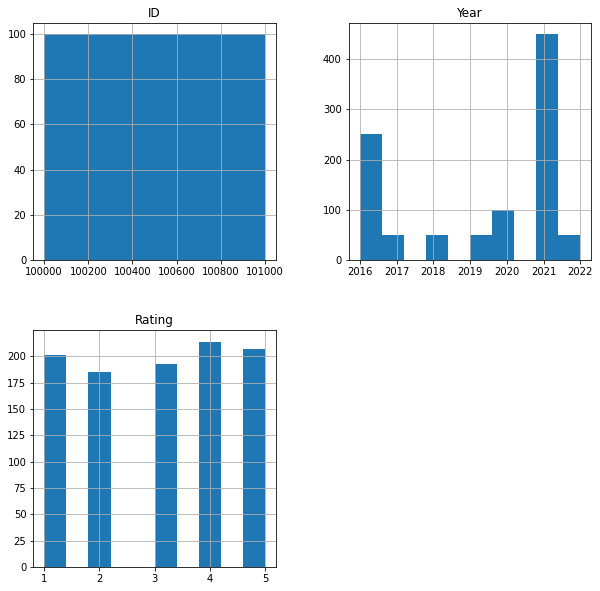

In [ ]:
df.hist(bins = 10, figsize=(10, 10))

<Axes: xlabel='Rating'>

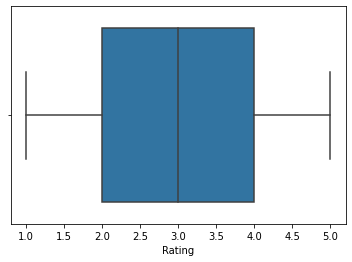

In [ ]:
sns.boxplot(x=df["Rating"])

<Axes: xlabel='Year'>

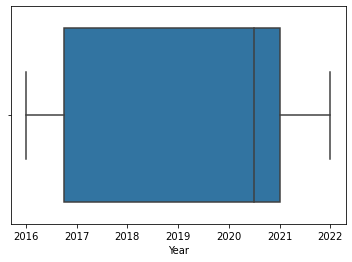

In [ ]:
sns.boxplot(x=df["Year"])

In [ ]:
df_1 = df[['Review_tokenized', 'Rating']]

In [ ]:
df_1['Rating'].value_counts(normalize=True)

4    0.214
5    0.207
1    0.201
3    0.193
2    0.185
Name: Rating, dtype: float64

In [ ]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }
labels = ['1', '2', '3', '4', '5']

y = df_1['Rating'].copy()
y.replace(encoding, inplace=True)

In [ ]:
df_1

,Review_tokenized,Rating
0,far best spiderman even marvel movie amount mo...,5
1,coming someone doesnt like previous two mcu sp...,5
2,marvel outdone quintessential mcu film date la...,5
3,saw fdfs beauty spiderman best spiderman movie...,5
4,best spiderman line takes top spot mcu movies ...,5
...,...,...
995,insulting worse movie ever watched,1
996,one sided agenda driven left laughable,1
997,propaganda movie,1
998,boring,1


In [ ]:
dummies = pd.get_dummies(df['Genres'])
df_1 = pd.concat([df_1['Review_tokenized'], dummies, df_1['Rating']], axis=1)

In [ ]:
df_1

,Review_tokenized,Action/Horror,Action/Adventure,Action/Comedy,Action/Fantasy,Action/Sci-fi,Horror/Thriller,Sci-fi/Adventure,Sci-fi/Romance,Thriller/Drama,Thriller/Mystery,Rating
0,far best spiderman even marvel movie amount mo...,0,1,0,0,0,0,0,0,0,0,5
1,coming someone doesnt like previous two mcu sp...,0,1,0,0,0,0,0,0,0,0,5
2,marvel outdone quintessential mcu film date la...,0,1,0,0,0,0,0,0,0,0,5
3,saw fdfs beauty spiderman best spiderman movie...,0,1,0,0,0,0,0,0,0,0,5
4,best spiderman line takes top spot mcu movies ...,0,1,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,insulting worse movie ever watched,0,0,0,0,0,0,0,0,1,0,1
996,one sided agenda driven left laughable,0,0,0,0,0,0,0,0,1,0,1
997,propaganda movie,0,0,0,0,0,0,0,0,1,0,1
998,boring,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
frequency = 6 # задаем порог отсечения для минимальной частоты слова в тексте

all_reviews = ' '.join(df_1['Review_tokenized']).split(' ')

all_reviews

['far',
 'best',
 'spiderman',
 'even',
 'marvel',
 'movie',
 'amount',
 'mood',
 'swings',
 'kept',
 'invested',
 'movie',
 'entire',
 'time',
 'fact',
 'tobey',
 'andrew',
 'came',
 'back',
 'brought',
 'old',
 'characters',
 'back',
 'life',
 'amazing',
 'honestly',
 'cant',
 'even',
 'think',
 'reason',
 'dislike',
 'movie',
 'anyway',
 'want',
 'talk',
 'end',
 'though',
 'one',
 'saddest',
 'saddest',
 'ending',
 'mcu',
 'endgame',
 'close',
 'nd',
 'think',
 'peter',
 'dating',
 'mj',
 'good',
 'days',
 'since',
 'relays',
 'ffh',
 'nwh',
 'love',
 'turned',
 'back',
 'strangers',
 'heartbreaking',
 'also',
 'seeing',
 'ned',
 'walk',
 'past',
 'peter',
 'without',
 'saying',
 'hi',
 'anything',
 'like',
 'soo',
 'sad',
 'cant',
 'wait',
 'come',
 'dvd',
 'ive',
 'already',
 'pre',
 'ordered',
 'movies',
 'anywhere',
 'coming',
 'someone',
 'doesnt',
 'like',
 'previous',
 'two',
 'mcu',
 'spiderman',
 'movies',
 'far',
 'best',
 'live',
 'action',
 'spiderman',
 'movie',
 'ever

In [ ]:
count_dic = {}

for a in all_reviews:
  count_dic[a] = all_reviews.count(a)

In [ ]:
count_dic

{'far': 62,
 'best': 161,
 'spiderman': 76,
 'even': 205,
 'marvel': 284,
 'movie': 1640,
 'amount': 18,
 'mood': 3,
 'swings': 1,
 'kept': 28,
 'invested': 5,
 'entire': 32,
 'time': 262,
 'fact': 41,
 'tobey': 8,
 'andrew': 9,
 'came': 55,
 'back': 113,
 'brought': 22,
 'old': 44,
 'characters': 226,
 'life': 60,
 'amazing': 128,
 'honestly': 43,
 'cant': 90,
 'think': 169,
 'reason': 62,
 'dislike': 5,
 'anyway': 20,
 'want': 69,
 'talk': 7,
 'end': 123,
 'though': 79,
 'one': 394,
 'saddest': 2,
 'ending': 53,
 'mcu': 125,
 'endgame': 14,
 'close': 17,
 'nd': 11,
 'peter': 11,
 'dating': 2,
 'mj': 7,
 'good': 392,
 'days': 10,
 'since': 36,
 'relays': 1,
 'ffh': 1,
 'nwh': 1,
 'love': 190,
 'turned': 14,
 'strangers': 1,
 'heartbreaking': 3,
 'also': 192,
 'seeing': 56,
 'ned': 5,
 'walk': 7,
 'past': 33,
 'without': 59,
 'saying': 29,
 'hi': 2,
 'anything': 51,
 'like': 537,
 'soo': 3,
 'sad': 19,
 'wait': 38,
 'come': 54,
 'dvd': 5,
 'ive': 58,
 'already': 25,
 'pre': 2,
 'ordere

In [ ]:
final_list = []

for k,v in count_dic.items():
  if v >= frequency:
    final_list.append(k)

In [ ]:
len(final_list)

1469

In [ ]:
for i in range(len(df_1['Review_tokenized'])):
  for word in final_list:
    df_1.loc[i, word] = int(df_1['Review_tokenized'][i].count(word))

<ipython-input-26-aa047a106091>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1.loc[i, word] = int(df_1['Review_tokenized'][i].count(word))
<ipython-input-26-aa047a106091>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1.loc[i, word] = int(df_1['Review_tokenized'][i].count(word))
<ipython-input-26-aa047a106091>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

In [ ]:
df_1

,Review_tokenized,Action/Horror,Action/Adventure,Action/Comedy,Action/Fantasy,Action/Sci-fi,Horror/Thriller,Sci-fi/Adventure,Sci-fi/Romance,Thriller/Drama,...,jenkins,cheeta,pratt,passengers,parineeti,snowden,edward,oliver,gordon,snowdens
0,far best spiderman even marvel movie amount mo...,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,coming someone doesnt like previous two mcu sp...,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,marvel outdone quintessential mcu film date la...,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,saw fdfs beauty spiderman best spiderman movie...,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,best spiderman line takes top spot mcu movies ...,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,insulting worse movie ever watched,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,one sided agenda driven left laughable,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,propaganda movie,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,boring,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_f = df_1.drop('Review_tokenized', axis = 1)

In [ ]:
df_f['Rating']

0      5
1      5
2      5
3      5
4      5
      ..
995    1
996    1
997    1
998    1
999    4
Name: Rating, Length: 1000, dtype: int64

In [ ]:
good_list = []
for d in df_f['Rating']:
  if d >= 3:
    good_list.append(1)
  else:
    good_list.append(0)

In [ ]:
df_f['Review_tone'] = good_list

<ipython-input-31-8cba291363b6>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_f['Review_tone'] = good_list


In [ ]:
df_f = df_f.drop('Rating', axis = 1)

In [ ]:
df_f.describe()

,Action/Horror,Action/Adventure,Action/Comedy,Action/Fantasy,Action/Sci-fi,Horror/Thriller,Sci-fi/Adventure,Sci-fi/Romance,Thriller/Drama,Thriller/Mystery,...,cheeta,pratt,passengers,parineeti,snowden,edward,oliver,gordon,snowdens,Review_tone
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.0000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.050000,0.250000,0.050000,0.15000,0.2000,0.050000,0.050000,0.050000,0.10000,0.050000,...,0.016000,0.011000,0.007000,0.007000,0.028000,0.010000,0.006000,0.009000,0.006000,0.614000
std,0.218054,0.433229,0.218054,0.35725,0.4002,0.218054,0.218054,0.218054,0.30015,0.218054,...,0.223145,0.104355,0.113859,0.094657,0.305466,0.126158,0.089286,0.104546,0.089286,0.487074
min,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.250000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.0000,1.000000,1.000000,1.000000,1.00000,1.000000,...,6.000000,1.000000,3.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
df_f.corr()['Review_tone']

 Action/Horror     -0.006597
Action/Adventure    0.011859
Action/Comedy      -0.006597
Action/Fantasy     -0.012081
Action/Sci-fi      -0.014379
                      ...   
edward              0.062880
oliver              0.030291
gordon              0.048633
snowdens            0.053308
Review_tone         1.000000
Name: Review_tone, Length: 1480, dtype: float64

In [ ]:
df_n = df_f
df_n = df_n.corr()['Review_tone'].reset_index()

In [ ]:
df_n = df_n[df_n.Review_tone < 1]

In [ ]:
print(df_n.sort_values(by='Review_tone', ascending=False).head())

          index  Review_tone
29      amazing     0.162554
50         love     0.145721
131  definitely     0.143675
168         fun     0.134804
387       great     0.133342


In [ ]:
print(df_n.sort_values(by='Review_tone', ascending=True).head())

            index  Review_tone
876         waste    -0.232622
838         worst    -0.209074
337         point    -0.192902
307      terrible    -0.189773
295  disappointed    -0.171104


## Матрицы корреляции

In [ ]:
df_g = df_n.head(10)

In [ ]:
df_g

,index,Review_tone
0,Action/Horror,-0.006597
1,Action/Adventure,0.011859
2,Action/Comedy,-0.006597
3,Action/Fantasy,-0.012081
4,Action/Sci-fi,-0.014379
5,Horror/Thriller,-0.006597
6,Sci-fi/Adventure,-0.006597
7,Sci-fi/Romance,-0.006597
8,Thriller/Drama,0.045190
9,Thriller/Mystery,-0.006597


In [ ]:
print(df_g.sort_values(by='Review_tone', ascending=False).head())

              index  Review_tone
8    Thriller/Drama     0.045190
1  Action/Adventure     0.011859
2     Action/Comedy    -0.006597
0     Action/Horror    -0.006597
6  Sci-fi/Adventure    -0.006597


In [ ]:
print(df_g.sort_values(by='Review_tone', ascending=True).head())

              index  Review_tone
4     Action/Sci-fi    -0.014379
3    Action/Fantasy    -0.012081
5  Horror/Thriller     -0.006597
7    Sci-fi/Romance    -0.006597
9  Thriller/Mystery    -0.006597


In [ ]:
df_f

,Action/Horror,Action/Adventure,Action/Comedy,Action/Fantasy,Action/Sci-fi,Horror/Thriller,Sci-fi/Adventure,Sci-fi/Romance,Thriller/Drama,Thriller/Mystery,...,cheeta,pratt,passengers,parineeti,snowden,edward,oliver,gordon,snowdens,Review_tone
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
997,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
998,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_f

,Action/Horror,Action/Adventure,Action/Comedy,Action/Fantasy,Action/Sci-fi,Horror/Thriller,Sci-fi/Adventure,Sci-fi/Romance,Thriller/Drama,Thriller/Mystery,...,cheeta,pratt,passengers,parineeti,snowden,edward,oliver,gordon,snowdens,Review_tone
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
997,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
998,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_f.drop('Review_tone', axis = 1), df_f['Review_tone'], test_size = 0.3, random_state = 123) # формируем тестовую и тренировочную выборки
X_train

,Action/Horror,Action/Adventure,Action/Comedy,Action/Fantasy,Action/Sci-fi,Horror/Thriller,Sci-fi/Adventure,Sci-fi/Romance,Thriller/Drama,Thriller/Mystery,...,jenkins,cheeta,pratt,passengers,parineeti,snowden,edward,oliver,gordon,snowdens
498,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Модель 1: Логистическая регрессия

In [ ]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
Y_pred1 = logreg.predict_proba(X_test)[:, 1]
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.6933333333333334
              precision    recall  f1-score   support

           0       0.62      0.61      0.61       120
           1       0.74      0.75      0.75       180

    accuracy                           0.69       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.69      0.69      0.69       300



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


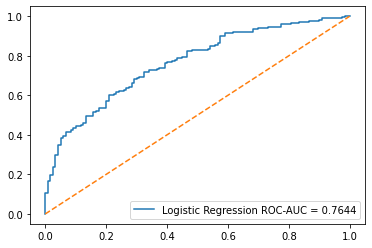

In [ ]:
fpr_1, tpr_1, thresholds_1 = roc_curve(Y_test, Y_pred1, pos_label=1)
roc_auc_1 = roc_auc_score(Y_test, Y_pred1, multi_class='ovr')
plt.figure()
plt.plot(fpr_1, tpr_1, label = 'Logistic Regression ROC-AUC = %.4f' %roc_auc_1)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend()

## Модель 2: Дерево решений

In [ ]:
clf = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10, min_impurity_decrease = 0.00000, random_state=23)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Y_pred1 = clf.predict_proba(X_test)[:, 1]
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

accuracy 0.7
              precision    recall  f1-score   support

           0       0.49      0.67      0.57        88
           1       0.84      0.71      0.77       212

    accuracy                           0.70       300
   macro avg       0.67      0.69      0.67       300
weighted avg       0.74      0.70      0.71       300



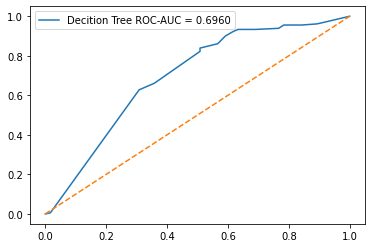

In [ ]:
fpr_2, tpr_2, thresholds_2 = roc_curve(Y_test, Y_pred1, pos_label=1)
roc_auc_2 = roc_auc_score(Y_test, Y_pred1, multi_class='ovr')
plt.figure()
plt.plot(fpr_2, tpr_2, label = 'Decition Tree ROC-AUC = %.4f' %roc_auc_2)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend()

## Модель 3: Случайный лес

In [ ]:
clf = RandomForestClassifier(bootstrap = True,
                             max_depth = 70,
                             max_features = 'auto',
                             min_samples_leaf = 4,
                             min_samples_split = 10,
                             n_estimators= 200)

clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Y_pred1 = clf.predict_proba(X_test)[:, 1]
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


accuracy 0.6933333333333334
              precision    recall  f1-score   support

           0       0.32      0.79      0.45        48
           1       0.94      0.67      0.79       252

    accuracy                           0.69       300
   macro avg       0.63      0.73      0.62       300
weighted avg       0.84      0.69      0.73       300



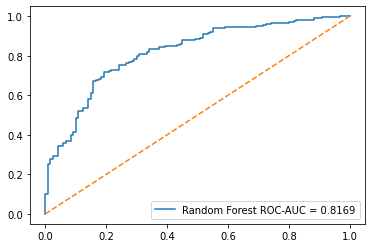

In [ ]:
fpr_3, tpr_3, thresholds_3 = roc_curve(Y_test, Y_pred1, pos_label=1)
roc_auc_3 = roc_auc_score(Y_test, Y_pred1, multi_class='ovr')
plt.figure()
plt.plot(fpr_3, tpr_3, label = 'Random Forest ROC-AUC = %.4f' %roc_auc_3)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend()

## Модель 4: Градиентный бустинг

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Y_pred1 = clf.predict_proba(X_test)[:, 1]
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

accuracy 0.7033333333333334
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       109
           1       0.78      0.74      0.76       191

    accuracy                           0.70       300
   macro avg       0.68      0.69      0.69       300
weighted avg       0.71      0.70      0.71       300



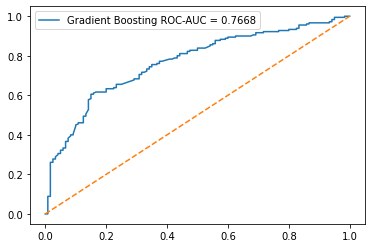

In [ ]:
fpr_4, tpr_4, thresholds_4 = roc_curve(Y_test, Y_pred1, pos_label=1)
roc_auc_4 = roc_auc_score(Y_test, Y_pred1, multi_class='ovr')
plt.figure()
plt.plot(fpr_4, tpr_4, label = 'Gradient Boosting ROC-AUC = %.4f' %roc_auc_4)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend()

## Модель 5: Метод ближайших соседей

accuracy 0.5866666666666667
              precision    recall  f1-score   support

           0       0.04      0.36      0.07        14
           1       0.95      0.60      0.73       286

    accuracy                           0.59       300
   macro avg       0.50      0.48      0.40       300
weighted avg       0.91      0.59      0.70       300



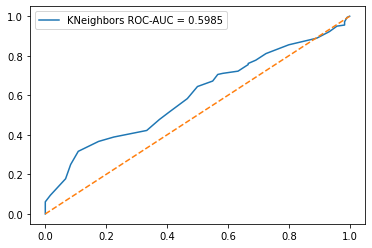

In [ ]:
clf = KNeighborsClassifier(n_neighbors=100)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Y_pred1 = clf.predict_proba(X_test)[:, 1]
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

fpr_5, tpr_5, thresholds_5 = roc_curve(Y_test, Y_pred1, pos_label=1)
roc_auc_5 = roc_auc_score(Y_test, Y_pred1, multi_class='ovr')
plt.figure()
plt.plot(fpr_5, tpr_5, label = 'KNeighbors ROC-AUC = %.4f' %roc_auc_5)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend()

## Модель 6: Адаптивное ускорение


accuracy 0.7633333333333333
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       117
           1       0.81      0.80      0.80       183

    accuracy                           0.76       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.76      0.76      0.76       300



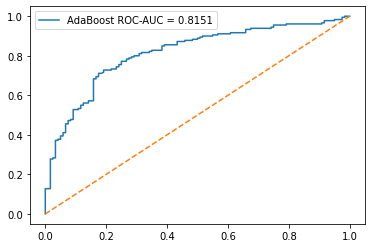

In [ ]:
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Y_pred1 = clf.predict_proba(X_test)[:, 1]
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

fpr_6, tpr_6, thresholds_6 = roc_curve(Y_test, Y_pred1, pos_label=1)
roc_auc_6 = roc_auc_score(Y_test, Y_pred1, multi_class='ovr')
plt.figure()
plt.plot(fpr_6, tpr_6, label = 'AdaBoost ROC-AUC = %.4f' %roc_auc_6)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend()

## Модель 7: Многослойный перцептрон

accuracy 0.7
              precision    recall  f1-score   support

           0       0.60      0.63      0.62       114
           1       0.77      0.74      0.75       186

    accuracy                           0.70       300
   macro avg       0.68      0.69      0.68       300
weighted avg       0.70      0.70      0.70       300



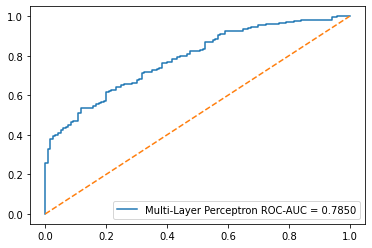

In [ ]:
clf = MLPClassifier(activation = 'relu', hidden_layer_sizes = (500), alpha = 0.0003, learning_rate_init = 0.0004, n_iter_no_change = 30, random_state=23)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
Y_pred1 = clf.predict_proba(X_test)[:, 1]
fpr_7, tpr_7, thresholds_7 = roc_curve(Y_test, Y_pred1)
roc_auc_7 = roc_auc_score(Y_test, Y_pred1)

print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

plt.figure()
plt.plot(fpr_7, tpr_7, label = 'Multi-Layer Perceptron ROC-AUC = %.4f' %roc_auc_7)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend()

## Общий график ROC-AUC

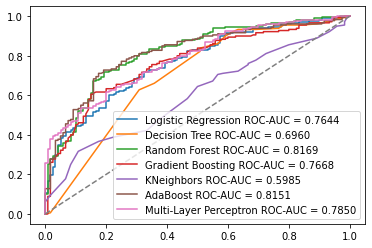

In [ ]:
plt.figure()
plt.plot(fpr_1, tpr_1, label = 'Logistic Regression ROC-AUC = %.4f' %roc_auc_1)
plt.plot(fpr_2, tpr_2, label = 'Decision Tree ROC-AUC = %.4f' %roc_auc_2)
plt.plot(fpr_3, tpr_3, label = 'Random Forest ROC-AUC = %.4f' %roc_auc_3)
plt.plot(fpr_4, tpr_4, label = 'Gradient Boosting ROC-AUC = %.4f' %roc_auc_4)
plt.plot(fpr_5, tpr_5, label = 'KNeighbors ROC-AUC = %.4f' %roc_auc_5)
plt.plot(fpr_6, tpr_6, label = 'AdaBoost ROC-AUC = %.4f' %roc_auc_6)
plt.plot(fpr_7, tpr_7, label = 'Multi-Layer Perceptron ROC-AUC = %.4f' %roc_auc_7)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.legend()

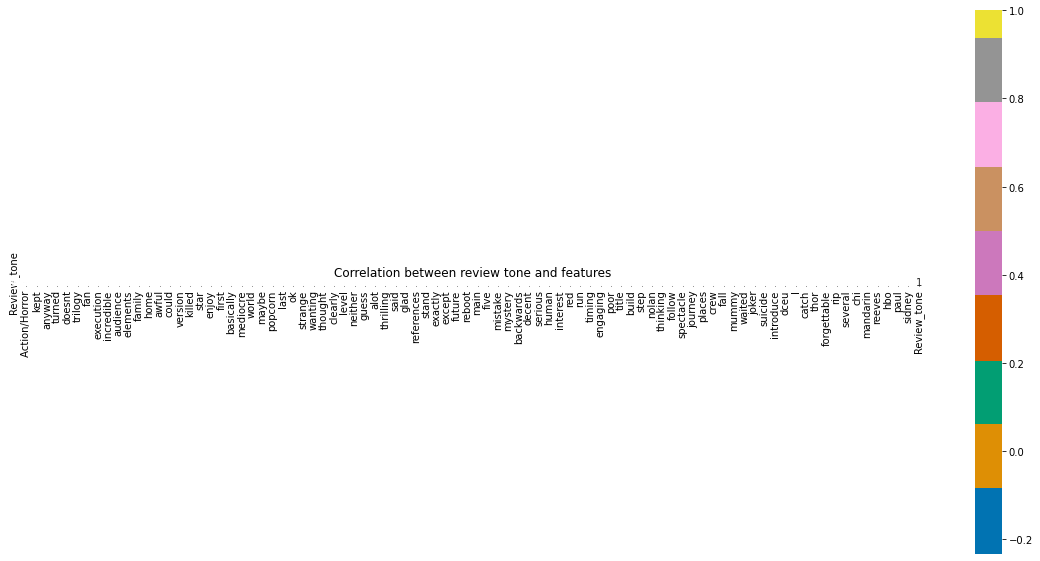

In [ ]:
df_cor = df_f.corr()[['Review_tone']]
plt.figure(figsize = (20,10))
palette = sns.color_palette('colorblind')
sns.heatmap(df_cor.T,annot = True, center=0.5, vmax=1,
            square=True, linewidths=.5,cmap = palette)
plt.title('Correlation between review tone and features')
#plt.tight_layout()
plt.show()
